In [183]:
import pandas as pd


In [184]:
dataset=pd.read_csv("heart.csv")

In [185]:
dataset

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125.0,212.0,0.0,1,168.0,0,1.0,2.0,2.0,3.0,0.0
1,53,1,0,140.0,203.0,1.0,0,155.0,1,3.1,0.0,0.0,3.0,0.0
2,70,1,0,145.0,174.0,0.0,1,125.0,1,2.6,0.0,0.0,3.0,0.0
3,61,1,0,148.0,203.0,0.0,1,161.0,0,0.0,2.0,1.0,3.0,0.0
4,62,0,0,138.0,294.0,1.0,1,106.0,0,1.9,1.0,3.0,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140.0,221.0,0.0,1,164.0,1,0.0,2.0,0.0,2.0,1.0
1021,60,1,0,125.0,258.0,0.0,0,141.0,1,2.8,1.0,1.0,3.0,0.0
1022,47,1,0,110.0,275.0,0.0,0,118.0,1,1.0,1.0,1.0,2.0,0.0
1023,50,0,0,110.0,254.0,0.0,0,159.0,0,0.0,2.0,0.0,2.0,1.0


In [186]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1022 non-null   float64
 4   chol      1023 non-null   float64
 5   fbs       1022 non-null   float64
 6   restecg   1025 non-null   int64  
 7   thalach   1020 non-null   float64
 8   exang     1025 non-null   int64  
 9   oldpeak   1022 non-null   float64
 10  slope     1022 non-null   float64
 11  ca        1023 non-null   float64
 12  thal      1023 non-null   float64
 13  target    1023 non-null   float64
dtypes: float64(9), int64(5)
memory usage: 112.2 KB


In [187]:
dataset.shape

(1025, 14)

In [188]:
dataset.isnull()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1021,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1022,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1023,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [189]:
dataset.isnull().sum()

age         0
sex         0
cp          0
trestbps    3
chol        2
fbs         3
restecg     0
thalach     5
exang       0
oldpeak     3
slope       3
ca          2
thal        2
target      2
dtype: int64

In [190]:
dataset['trestbps'] = dataset['trestbps'].interpolate(method='linear')

In [191]:
dataset.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        2
fbs         3
restecg     0
thalach     5
exang       0
oldpeak     3
slope       3
ca          2
thal        2
target      2
dtype: int64

In [192]:
from sklearn.impute import SimpleImputer

In [193]:
imputer = SimpleImputer(strategy='mean')

In [194]:
dataset = pd.DataFrame(imputer.fit_transform(dataset), columns=dataset.columns)

In [195]:
dataset.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [196]:
from sklearn.model_selection import train_test_split



In [197]:
# Assume your dataset is stored in a pandas DataFrame called 'dataset'
X = dataset.drop('target', axis=1)
y = dataset['target']



X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)



In [198]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
835,49.0,1.0,2.0,118.0,149.0,0.0,0.0,126.0,0.0,0.8,2.0,3.0,2.0
137,64.0,0.0,0.0,180.0,325.0,0.0,1.0,154.0,1.0,0.0,2.0,0.0,2.0
534,54.0,0.0,2.0,108.0,267.0,0.0,0.0,167.0,0.0,0.0,2.0,0.0,2.0
495,59.0,1.0,0.0,135.0,234.0,0.0,1.0,161.0,0.0,0.5,1.0,0.0,3.0
244,51.0,1.0,2.0,125.0,245.0,1.0,0.0,166.0,0.0,2.4,1.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
700,41.0,1.0,2.0,130.0,214.0,0.0,0.0,168.0,0.0,2.0,1.0,0.0,2.0
71,61.0,1.0,0.0,140.0,207.0,0.0,0.0,138.0,1.0,1.9,2.0,1.0,3.0
106,51.0,1.0,0.0,140.0,299.0,0.0,1.0,173.0,1.0,1.6,2.0,0.0,3.0
270,43.0,1.0,0.0,110.0,211.0,0.0,1.0,161.0,0.0,0.0,2.0,0.0,3.0


In [199]:
value = dataset["trestbps"]
print(value)

0       125.0
1       140.0
2       145.0
3       148.0
4       138.0
        ...  
1020    140.0
1021    125.0
1022    110.0
1023    110.0
1024    120.0
Name: trestbps, Length: 1025, dtype: float64


In [200]:
value2 = dataset["age"]
print(value2)

0       52.0
1       53.0
2       70.0
3       61.0
4       62.0
        ... 
1020    59.0
1021    60.0
1022    47.0
1023    50.0
1024    54.0
Name: age, Length: 1025, dtype: float64


In [201]:
import matplotlib.pyplot as plt

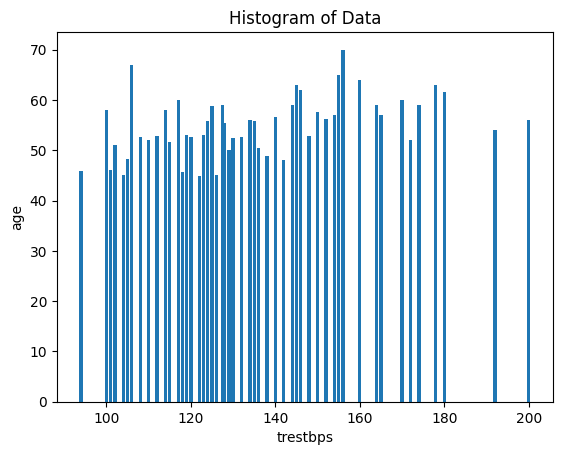

In [204]:
grouped_data = dataset.groupby('trestbps')['age'].mean()
plt.bar(grouped_data.index, grouped_data.values)


plt.xlabel('trestbps')
plt.ylabel('age')
plt.title('Histogram of Data')

plt.show()